### Table of Contents
* [Presentation](#chapter0)
* [Chargement du dataset](#chapter0)
* [Etude du dataset](#chapter00)
* [Etude des valeurs manquantes](#chapter1)
* [Etude des valeurs aberrantes](#chapter2)
     * [Duplicatas](#section_2_1)
     * [Outliers et valeurs négatives](#section_2_2)
* [Réduction du nombre de variable](#chapter3)
    * [Variables inutilisables et males renseignées](#section_2_3)
     * [Variables corrélées](#section_2_4)
     * [Variables liées à la problématique](#section_2_5)
* [Features engineering](#chapter4)
* [Analyse exploratoire](#chapter5)

# Presentation  <a class="anchor" id='chapter0'></a>

https://docs.google.com/presentation/d/1OFDVz5BU7CKdbmVaWFwMxT5u_4BurZoN_LgyrZNbMAc/edit?usp=sharing

# Chargement du dataset  <a class="anchor" id='chapter0'></a>

In [2]:
import pandas as pd

data = pd.read_csv(
    r"/Users/jeaneudesdesgraviers/Downloads/2016_Building_Energy_Benchmarking.csv"
)

# Etude du dataset <a class="anchor" id='chapter00'></a>

In [3]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [4]:
data.shape

(3376, 46)

In [5]:
#Etude du type des variables

data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [6]:
data.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


# Etude des valeurs manquantes <a class="anchor" id='chapter1'></a>

<Axes: title={'center': 'Proportion de NaN par variable (%)'}>

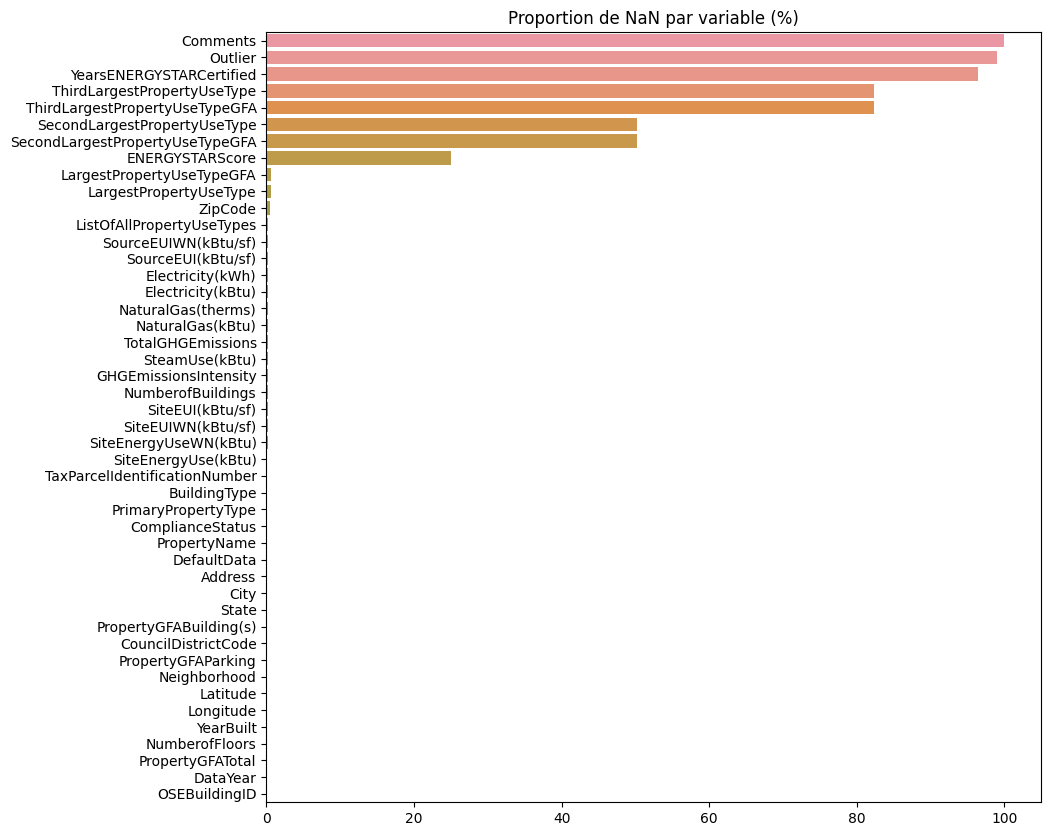

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# affichages des valeurs manquantes

data_nan = data.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 10))
plt.title("Proportion de NaN par variable (%)")
sns.barplot(x=data_nan.values / data.shape[0] * 100, y=data_nan.index)

In [12]:
# 80+% des variables sont renseignées à 99+%, le dataset est globalement bien renséigné.

# Etude des valeurs aberrantes <a class="anchor" id="chapter2"></a>

## Duplicatas <a class="anchor" id="section_2_1"></a>

In [13]:
# drop des duplicatas en fonction du type de propriétée et de l'adresse

data.drop_duplicates(subset=["PrimaryPropertyType", "Address"], inplace=True)
data.shape

(3366, 46)

## Outliers et valeurs négatives <a class="anchor" id="section_2_2"></a>

In [14]:
# drop des outlier et non compliants

data = data[~data["Outlier"].str.contains("High outlier", na=False)]
data = data[~data["Outlier"].str.contains("Low outlier", na=False)]
data = data[~data["ComplianceStatus"].str.contains("Non-Compliant")]
data.shape

(3327, 46)

In [15]:
# drop des valeurs negatives pour la target 1

data = data[data['TotalGHGEmissions'] > 0]
data.shape

(3315, 46)

In [16]:
# drop des valeurs negatives pour la target 2

data = data[data["SiteEnergyUseWN(kBtu)"] > 0]
data.shape

(3292, 46)

<Axes: >

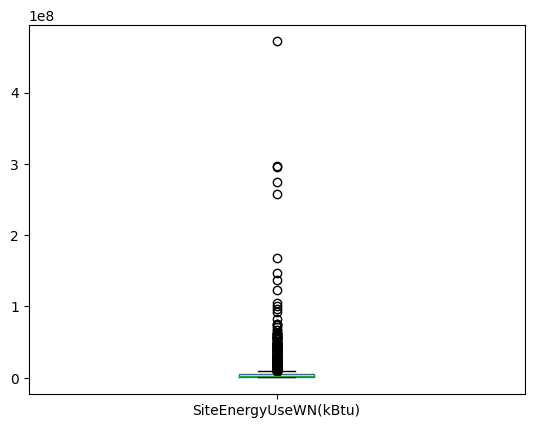

In [17]:
data.boxplot(column="SiteEnergyUseWN(kBtu)", grid=False)

<Axes: >

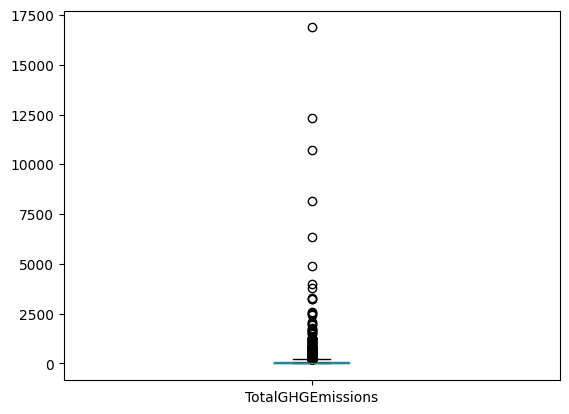

In [18]:
data.boxplot(column="TotalGHGEmissions", grid=False)

In [19]:
# Grande variance de nos target, cependant les outliers ont déja été traités avec les colonnes adéquates.
# Pas de méthodes supplémentaire pour traiter les outliers car cela entrainerait du dataleakage.

In [20]:
data.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3292.000000,3292.0,3276.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3.292000e+03,...,3.292000e+03,3.292000e+03,3.292000e+03,3.292000e+03,3.292000e+03,3.292000e+03,3.292000e+03,0.0,3292.000000,3292.000000
mean,21220.395808,2016.0,98116.914225,4.445626,47.624189,-122.334707,1968.656136,1.074423,4.721446,9.210355e+04,...,5.166336e+06,5.344781e+06,2.482088e+05,1.032865e+06,3.524134e+06,1.380610e+04,1.380610e+06,NaN,117.051051,1.180106
std,12107.583355,0.0,18.611175,2.115997,0.047625,0.027157,33.074691,0.933649,5.491231,1.500645e+05,...,1.571572e+07,1.609243e+07,3.662385e+06,2.851888e+06,9.730643e+06,6.778630e+04,6.778630e+06,NaN,509.263422,1.821233
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,5.713320e+04,5.811420e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.400000,0.010000
25%,20020.000000,2016.0,98105.000000,3.000000,47.600180,-122.350320,1948.000000,1.000000,2.000000,2.841675e+04,...,9.422336e+05,9.969960e+05,0.000000e+00,1.898227e+05,6.476750e+05,0.000000e+00,0.000000e+00,NaN,9.657500,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618790,-122.332480,1975.000000,1.000000,4.000000,4.409900e+04,...,1.815159e+06,1.940739e+06,0.000000e+00,3.463329e+05,1.181688e+06,3.334130e+03,3.334130e+05,NaN,34.155000,0.620000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657260,-122.319485,1997.000000,1.000000,5.000000,9.112850e+04,...,4.221247e+06,4.421963e+06,0.000000e+00,8.303788e+05,2.833252e+06,1.198277e+04,1.198277e+06,NaN,93.905000,1.380000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,27.000000,99.000000,2.200000e+06,...,4.483853e+08,4.716139e+08,1.349435e+08,8.046087e+07,2.745325e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [21]:
data.shape

(3292, 46)

# Reduction du nombre de variable <a class='anchor' id='chapter3'></a>

## Variables inutilisables, non pertinentes et males renseignées <a class='anchor' id='section_2_3'></a>

In [22]:
# drop des variables inexploitables car complexes à discrétiser ou ininterressantes par rapport à la problématique,
# on gardera la latitude et la longitude pour créer le Haversine score

data = data.drop(
    [
        "OSEBuildingID",
        "TaxParcelIdentificationNumber",
        "PropertyName",
        "Address",
        "ListOfAllPropertyUseTypes",
        "DataYear",
        "City",
        "State",
        "ZipCode",
        "DefaultData",
    ],
    axis=1,
)
data = data.drop(
    ["CouncilDistrictCode", "PropertyGFAParking", "ComplianceStatus"], axis=1
)

In [23]:
# drop de la variable NumberofBuildings car très faible variance et valeurs aberrantes 0

# data.loc[data.NumberofBuildings == 0,:]
# data['NumberofBuildings'].value_counts()
data = data.drop(["NumberofBuildings"], axis=1)

In [24]:
# drop de la variable largest property use type car redondante avec la variable Primarypropertytype

data = data.drop(["LargestPropertyUseType"], axis=1)

In [25]:
# drop des variables inexploitables car trop de valeurs manquantes

data = data.drop(
    [
        "Outlier",
        "Comments",
        "YearsENERGYSTARCertified",
        "SecondLargestPropertyUseType",
        "SecondLargestPropertyUseTypeGFA",
        "ThirdLargestPropertyUseType",
        "ThirdLargestPropertyUseTypeGFA",
    ],
    axis=1,
)
data.shape

(3292, 24)

In [26]:
# réécriture des valeurs pour neighborhood

data["Neighborhood"] = data["Neighborhood"].replace(
    {
        "Northwest": "NORTHWEST",
        "North": "NORTH",
        "Ballard": "BALLARD",
        "Delridge": "DELRIDGE",
        "DELRIDGE NEIGHBORHOODS": "DELRIDGE",
        "Central": "CENTRAL",
    }
)

In [27]:
# réécriture des valeurs 0 pour la variable numberoffloors en 1

data.NumberofFloors.replace(0, 1, inplace=True)

## Variables corrélées <a class='anchor' id='section_2_4'></a>

In [28]:
# Matrice de corrélation

cor = data.corr()
cor

/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_16873/3011816003.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
Latitude,1.000000,-0.006060,0.118017,-0.024540,-0.039907,-0.044868,-0.042189,0.086227,-0.015172,-0.017904,...,-0.002420,-0.042578,-0.043586,-0.022005,-0.044125,-0.044125,-0.021705,-0.021705,-0.033437,-0.044232
Longitude,-0.006060,1.000000,-0.049593,-0.026820,0.020545,0.023680,0.027757,-0.026342,0.028431,0.030541,...,0.021131,0.031470,0.032604,0.013083,0.022265,0.022265,0.034154,0.034154,0.034372,0.039452
YearBuilt,0.118017,-0.049593,1.000000,0.146076,0.184350,0.162770,0.160602,0.033546,-0.022252,-0.032810,...,0.039201,0.071217,0.069733,-0.003962,0.101715,0.101715,0.022524,0.022524,0.027273,-0.148642
NumberofFloors,-0.024540,-0.026820,0.146076,1.000000,0.603994,0.577079,0.580458,0.026250,0.005559,0.000004,...,0.033094,0.299548,0.297997,0.090369,0.405670,0.405670,0.063864,0.063864,0.149348,-0.044838
PropertyGFATotal,-0.039907,0.020545,0.184350,0.603994,1.000000,0.980558,0.949407,0.070921,0.088670,0.081431,...,0.103255,0.600247,0.599231,0.268831,0.676718,0.676718,0.273835,0.273835,0.432952,0.030576
PropertyGFABuilding(s),-0.044868,0.023680,0.162770,0.577079,0.980558,1.000000,0.946745,0.068290,0.076590,0.069911,...,0.084737,0.617413,0.616573,0.299279,0.678849,0.678849,0.294070,0.294070,0.464442,0.045220
LargestPropertyUseTypeGFA,-0.042189,0.027757,0.160602,0.580458,0.949407,0.946745,1.000000,0.060964,0.077220,0.070948,...,0.080805,0.661156,0.660986,0.360892,0.699303,0.699303,0.333206,0.333206,0.529044,0.089639
ENERGYSTARScore,0.086227,-0.026342,0.033546,0.026250,0.070921,0.068290,0.060964,1.000000,-0.328267,-0.334844,...,-0.298865,-0.086335,-0.086495,-0.039054,-0.052942,-0.052942,-0.100831,-0.100831,-0.099160,-0.257896
SiteEUI(kBtu/sf),-0.015172,0.028431,-0.022252,0.005559,0.088670,0.076590,0.077220,-0.328267,1.000000,0.998738,...,0.946988,0.401146,0.396323,0.110172,0.418613,0.418613,0.263273,0.263273,0.303033,0.738842
SiteEUIWN(kBtu/sf),-0.017904,0.030541,-0.032810,0.000004,0.081431,0.069911,0.070948,-0.334844,0.998738,1.000000,...,0.939376,0.395237,0.391422,0.108912,0.408175,0.408175,0.265382,0.265382,0.302434,0.752932


<Axes: >

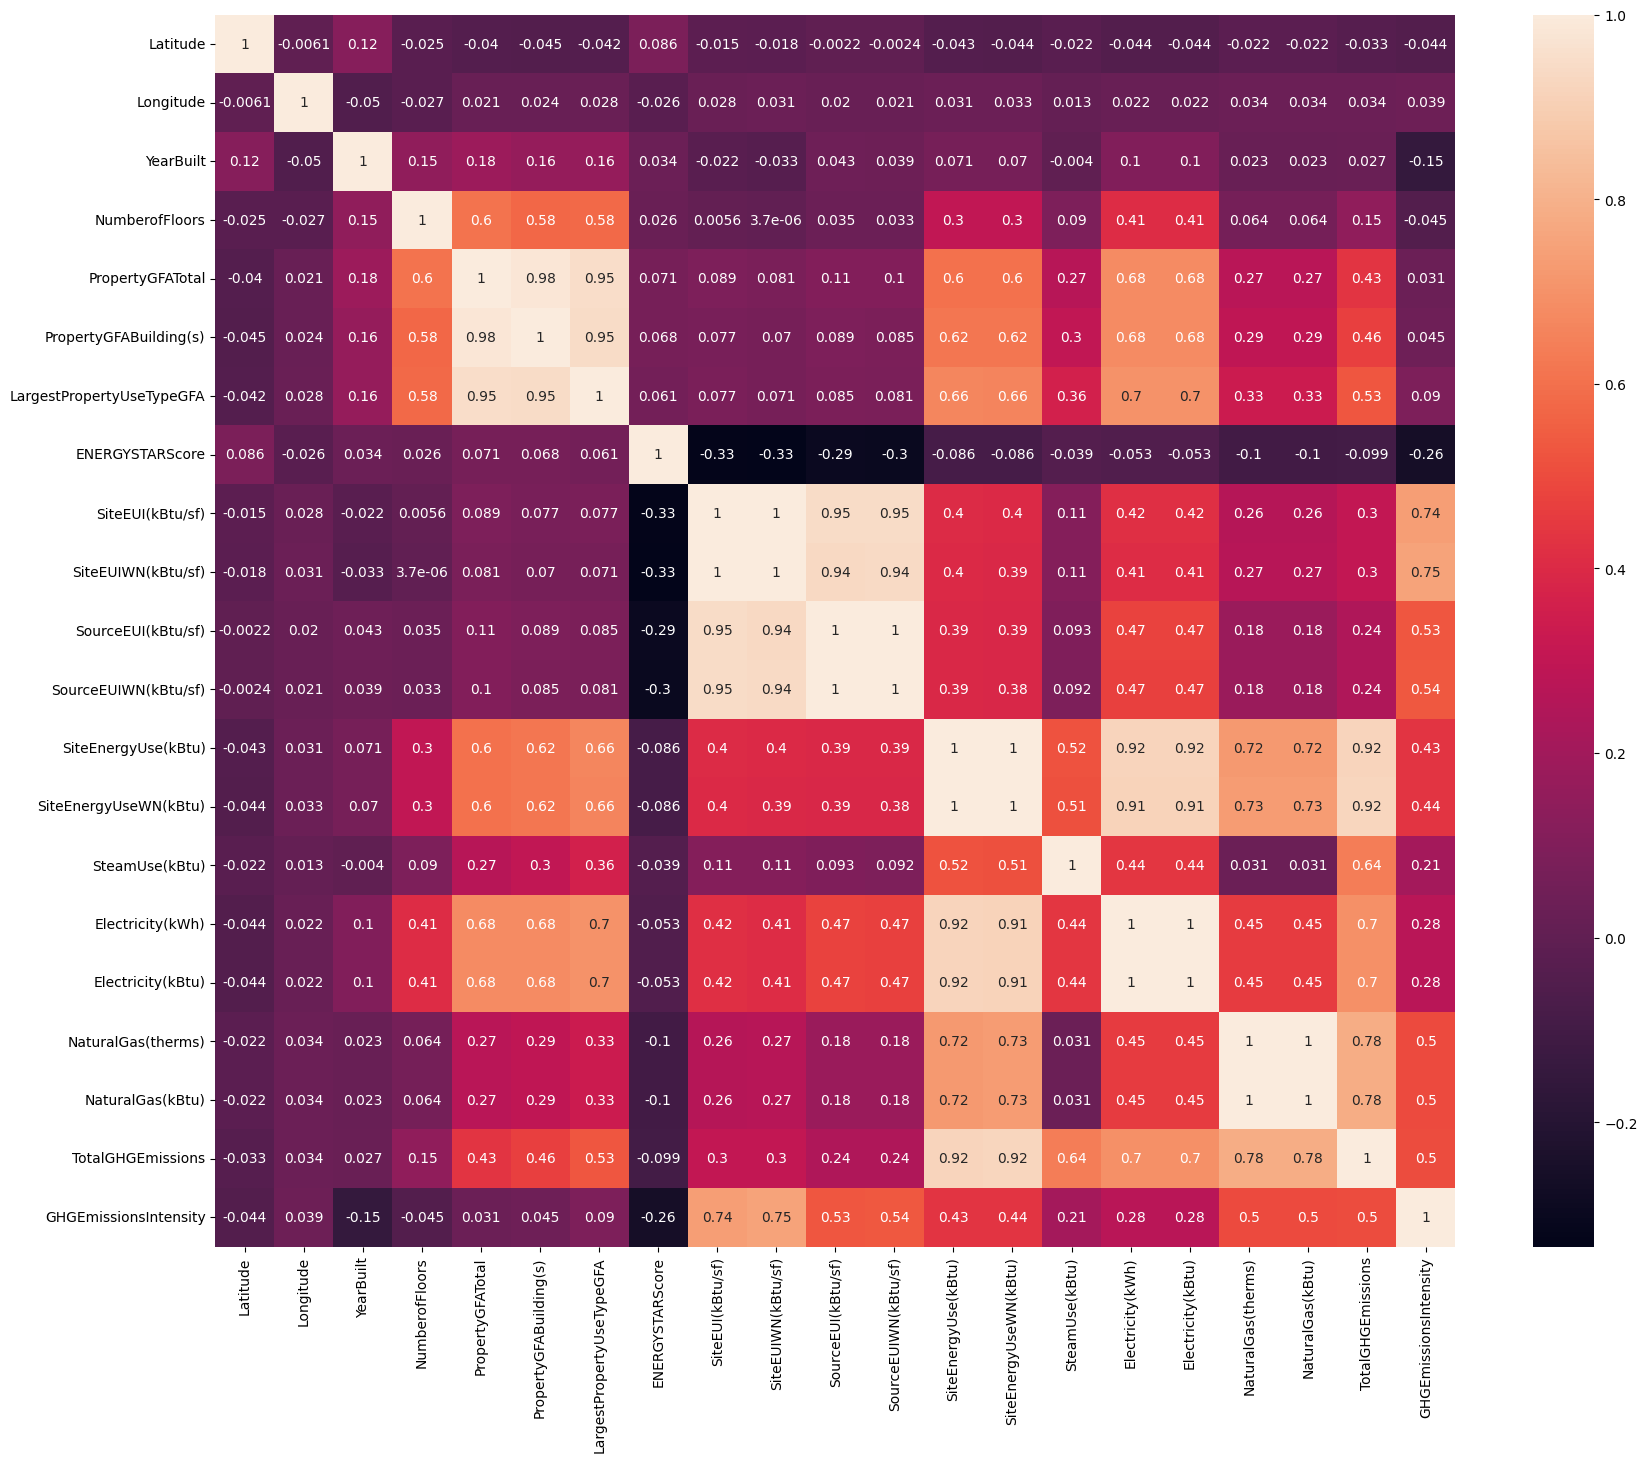

In [29]:
plt.figure(figsize=(20, 16))
sns.heatmap(data=cor, annot=True)

In [30]:
# drop des features corrélées entres elles

upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print()
print(to_drop)


['PropertyGFABuilding(s)', 'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']


/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_16873/2124543001.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))


In [31]:
data = data.drop(
    [
        "LargestPropertyUseTypeGFA",
        "SiteEUI(kBtu/sf)",
        "SourceEUIWN(kBtu/sf)",
        "SiteEnergyUse(kBtu)",
        "Electricity(kWh)",
        "NaturalGas(therms)",
        "PropertyGFABuilding(s)",
    ],
    axis=1,
)

## Variables liées à la problématique <a class='anchor' id='section_2_5'></a>

In [32]:
# drop des building de type residentiels

data["BuildingType"].unique()
data = data[~data["BuildingType"].str.contains("Multifamily")]
data = data[~data["PrimaryPropertyType"].str.contains("Multifamily")]
data.shape

(1610, 17)

In [33]:
# drop des variables liés au relevés car trop couteux pour etre pris en compte

data = data.drop(
    [
        "SteamUse(kBtu)",
        "SiteEUIWN(kBtu/sf)",
        "SourceEUI(kBtu/sf)",
        "Electricity(kBtu)",
        "NaturalGas(kBtu)",
        "GHGEmissionsIntensity",
    ],
    axis=1,
)
data.shape

(1610, 11)

# Feature engeniering <a class='anchor' id='chapter4'></a>

In [34]:
# creation de la variable distance haversine

from math import radians, cos, sin, asin, sqrt

# Coordonnées du centre de Seattle
seattle_lat = 47.6062
seattle_lon = -122.3321


def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956  # rayon de la Terre en miles

    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])

    # Formule Haversine
    dlng = lng2 - lng1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlng / 2) ** 2
    d = 2 * r * asin(sqrt(a))

    return d

In [35]:
data["haversine_distance"] = [
    haversine_distance(seattle_lat, seattle_lon, x, y)
    for x, y in zip(data.Latitude.astype(float), data.Longitude.astype(float))
]

In [36]:
# drop des features latitude et longtiude

data1 = data.drop(["Latitude", "Longitude"], axis=1)

In [37]:
# Creation de la feature BuildingAge

data["YearBuilt"] = data["YearBuilt"].apply(lambda x: 2016 - x)
data.rename(columns={"YearBuilt": "BuildingAge"}, inplace=True)
data.describe()

,Latitude,Longitude,BuildingAge,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,haversine_distance
count,1610.000000,1610.000000,1610.000000,1610.000000,1.610000e+03,1064.000000,1.610000e+03,1610.000000,1610.000000
mean,47.616065,-122.332834,54.113043,4.160248,1.137467e+05,65.137218,8.259789e+06,182.053217,2.808454
std,0.047990,0.024532,32.707182,6.636184,1.940391e+05,28.451539,2.235016e+07,713.679410,2.203603
min,47.499170,-122.411820,1.000000,1.000000,1.128500e+04,1.000000,5.811420e+04,0.400000,0.021130
25%,47.585315,-122.342945,27.000000,1.000000,2.939550e+04,47.750000,1.362387e+06,20.797500,0.869149
50%,47.612350,-122.332890,51.000000,2.000000,4.915450e+04,73.000000,2.782741e+06,50.680000,2.302589
75%,47.649645,-122.321777,86.000000,4.000000,1.057750e+05,89.000000,7.338307e+06,144.695000,4.224650
max,47.733870,-122.258640,116.000000,99.000000,2.200000e+06,100.000000,4.716139e+08,16870.980000,8.843544


In [38]:
# Creation de la feature pourcentage par property type

dfgroupby = data.groupby(["PrimaryPropertyType"]).size()
occur = pd.DataFrame(dfgroupby.items(), columns=["item", "score"])
occur["perc"] = (occur["score"] * 100) / occur["score"].sum()
occur = occur.sort_values(by="perc")
occur

,item,score,perc
8,Office,3,0.186335
1,Hospital,10,0.621118
4,Laboratory,10,0.621118
10,Refrigerated Warehouse,12,0.745342
12,Restaurant,12,0.745342
15,Senior Care Community,20,1.242236
18,University,21,1.304348
11,Residence Hall,21,1.304348
14,Self-Storage Facility,28,1.739130
17,Supermarket / Grocery Store,39,2.422360


In [39]:
# Creation du dictionnaire et mapping dans notre nouvelle variable

di = pd.Series(occur.perc.values, index=occur.item).to_dict()

data["PercentagePerPropertyType"] = data["PrimaryPropertyType"].map(di)

In [40]:
# Copie du dataset

data1 = data
data1 = data.rename(columns={"SiteEnergyUseWN(kBtu)": "SiteEnergyUseWN"})

In [41]:
# Creation des variables logarithmiques

pd.set_option("display.float_format", lambda x: "%.5f" % x)
data.describe()

,Latitude,Longitude,BuildingAge,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,haversine_distance,PercentagePerPropertyType
count,1610.00000,1610.00000,1610.00000,1610.00000,1610.00000,1064.00000,1610.00000,1610.00000,1610.00000,1610.00000
mean,47.61607,-122.33283,54.11304,4.16025,113746.68447,65.13722,8259788.99349,182.05322,2.80845,9.86652
std,0.04799,0.02453,32.70718,6.63618,194039.07304,28.45154,22350161.81991,713.67941,2.20360,5.53826
min,47.49917,-122.41182,1.00000,1.00000,11285.00000,1.00000,58114.19922,0.40000,0.02113,0.18634
25%,47.58531,-122.34295,27.00000,1.00000,29395.50000,47.75000,1362386.96875,20.79750,0.86915,4.65839
50%,47.61235,-122.33289,51.00000,2.00000,49154.50000,73.00000,2782740.75000,50.68000,2.30259,10.31056
75%,47.64964,-122.32178,86.00000,4.00000,105775.00000,89.00000,7338307.37500,144.69500,4.22465,15.15528
max,47.73387,-122.25864,116.00000,99.00000,2200000.00000,100.00000,471613856.00000,16870.98000,8.84354,17.70186


In [42]:
data1["SiteEnergyUseWN_log"] = np.log(data1["SiteEnergyUseWN"])

In [43]:
data1["BuildingAge_log"] = np.log(data1["BuildingAge"])

In [44]:
data1["TotalGHGEmissions_log"] = np.log(data1["TotalGHGEmissions"])

In [45]:
data1["PropertyGFATotal_log"] = np.log(data1["PropertyGFATotal"])

In [46]:
data1["ENERGYSTARScore_log"] = np.log(data1["ENERGYSTARScore"])

In [47]:
# Copie du dataset sans feature engineering pour l'exporter vers le notebook modelisation

data.to_csv("data.csv")
data1.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'BuildingAge', 'NumberofFloors', 'PropertyGFATotal',
       'ENERGYSTARScore', 'SiteEnergyUseWN', 'TotalGHGEmissions',
       'haversine_distance', 'PercentagePerPropertyType',
       'SiteEnergyUseWN_log', 'BuildingAge_log', 'TotalGHGEmissions_log',
       'PropertyGFATotal_log', 'ENERGYSTARScore_log'],
      dtype='object')

In [48]:
# drop des features qui n'ont pas été modifiées dans le feature engineering

data1 = data1.drop(
    [
        "TotalGHGEmissions",
        "BuildingAge",
        "SiteEnergyUseWN",
        "PropertyGFATotal",
    ],
    axis=1,
)

# creation du fichier avec le dataset contenant le feature engineeing pour l'exporter vers le notebook modelisation

data1.to_csv("data1.csv")
data1.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'NumberofFloors', 'ENERGYSTARScore', 'haversine_distance',
       'PercentagePerPropertyType', 'SiteEnergyUseWN_log', 'BuildingAge_log',
       'TotalGHGEmissions_log', 'PropertyGFATotal_log', 'ENERGYSTARScore_log'],
      dtype='object')

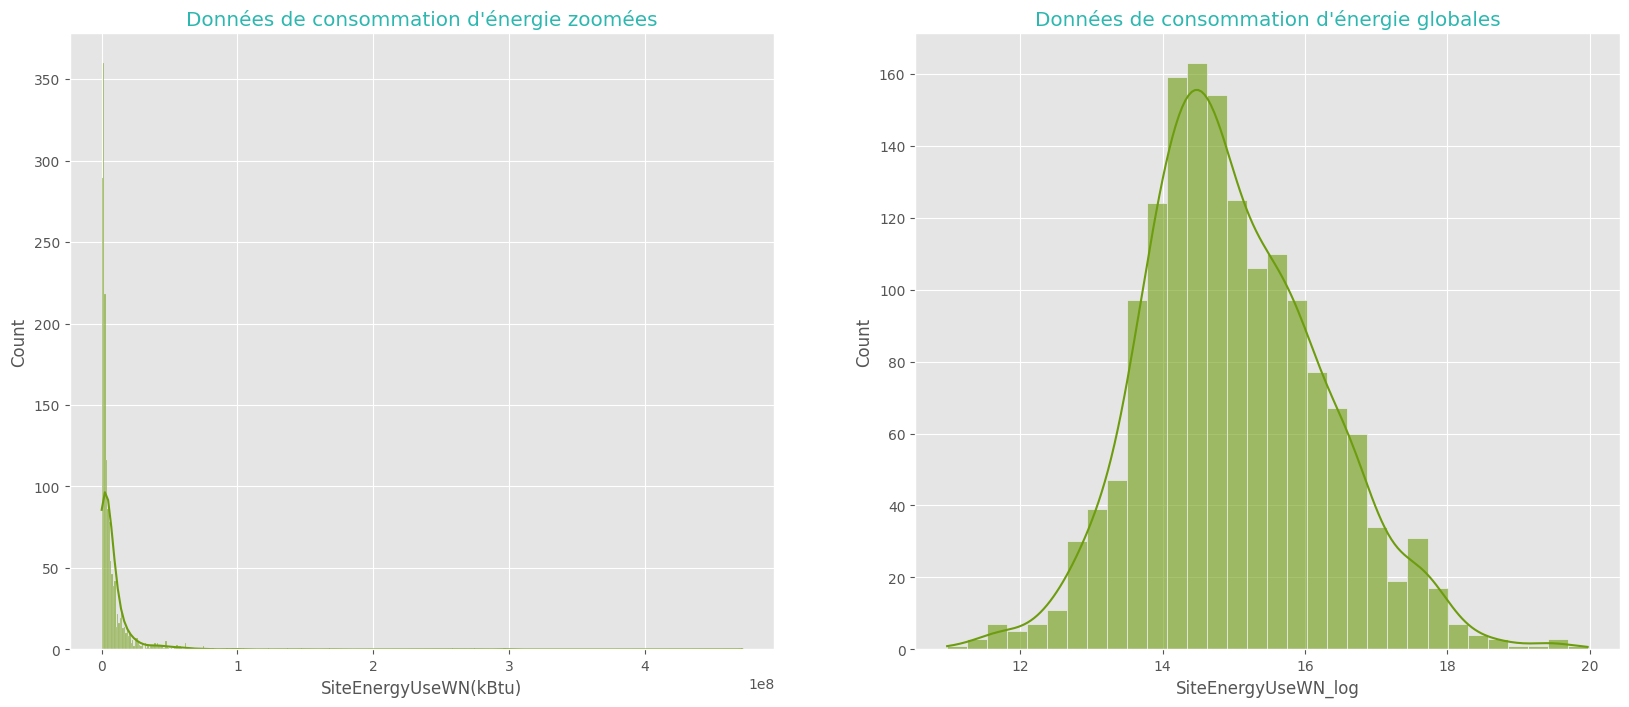

In [49]:
# Représentation graphique de notre changement d'echelle logarithmique

plt.style.use("ggplot")

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20, 8))

sns.histplot(
    data=data1,
    x="SiteEnergyUseWN_log",
    kde=True,
    ax=axes[1],
    color="#6D9C0E",
    alpha=0.6,
)
axes[1].set_title("Données de consommation d'énergie globales", color="#2cb7b0")

sns.histplot(
    data=data,
    x="SiteEnergyUseWN(kBtu)",
    kde=True,
    ax=axes[0],
    color="#6D9C0E",
    alpha=0.6,
)
axes[0].set_title("Données de consommation d'énergie zoomées", color="#2cb7b0")

plt.show()

In [50]:
''''' 
        L'echelle logarithmique améliore la distributivité des features et de la target.
        
''''' 

"'' \n        L'echelle logarithmique améliore la distributivité des features et de la target.\n        \n"

# Analyse exploratoire <a class='anchor' id='chapter5'></a>

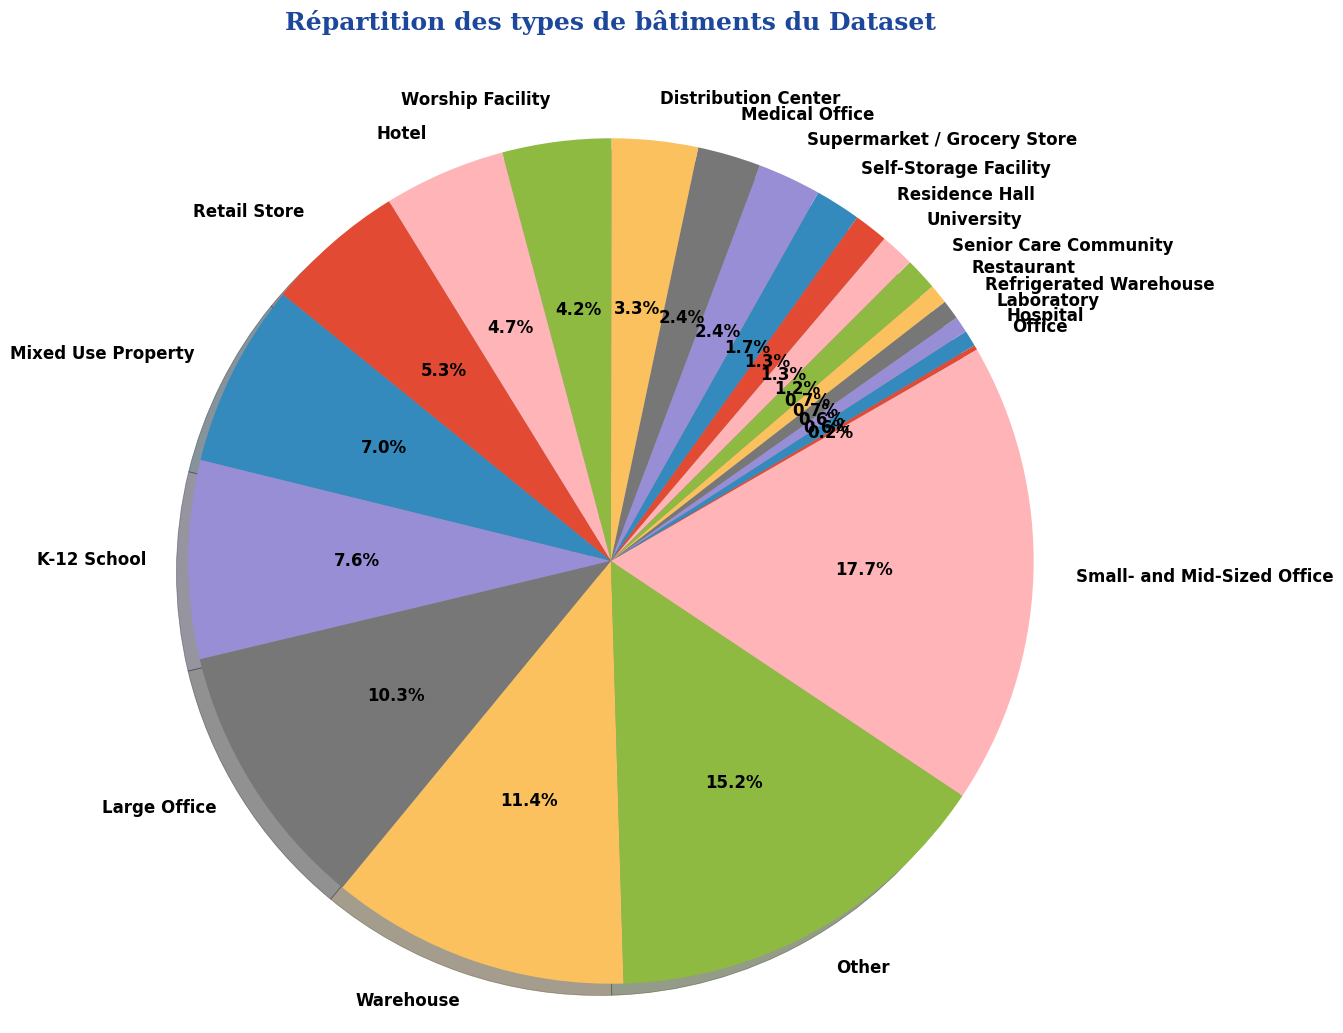

In [51]:
font_title = {"family": "serif", "color": "#1d479b", "weight": "bold", "size": 18}
fig, ax = plt.subplots(figsize=(12, 12))
ax.pie(
    occur["score"].values,
    labels=occur["item"],
    autopct="%1.1f%%",
    shadow=True,
    startangle=30,
    textprops=dict(color="black", size=12, weight="bold"),
)
ax.axis("equal")
ax.set_title(
    "Répartition des types de bâtiments du Dataset", fontdict=font_title, pad=50
)
plt.show()

In [52]:
'''''
        Il y a une distribution inégale des types de bâtiments. 
        4 types de batiments sur 21 représentes plus de 50% des observations.

'''''

"''\n        Il y a une distribution inégale des types de bâtiments. \n        4 types de batiments sur 21 représentes plus de 50% des observations.\n\n"

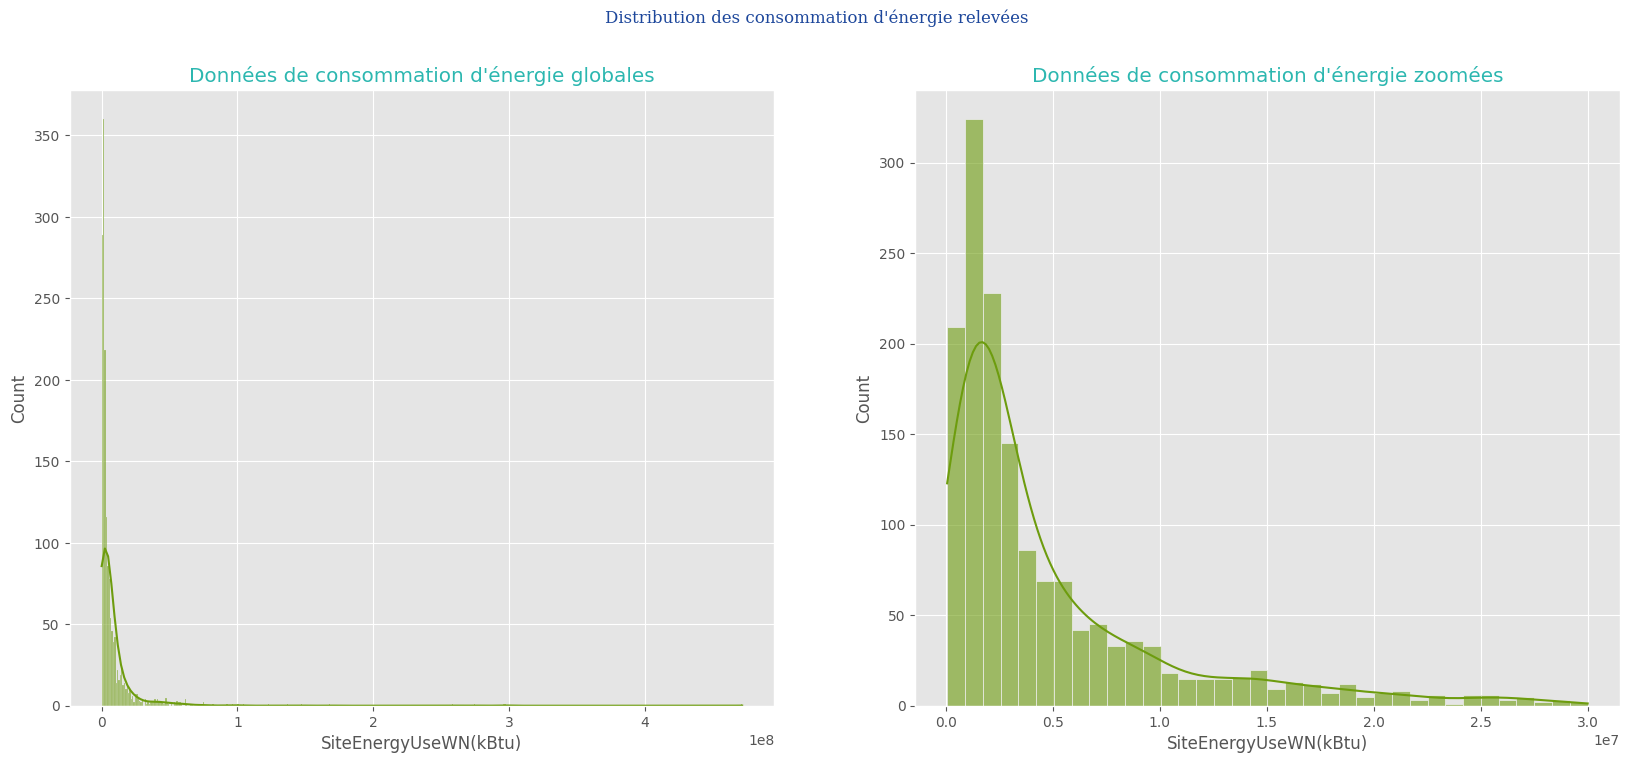

In [53]:
plt.style.use("ggplot")

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20, 8))

sns.histplot(
    data=data,
    x="SiteEnergyUseWN(kBtu)",
    kde=True,
    ax=axes[0],
    color="#6D9C0E",
    alpha=0.6,
)
axes[0].set_title("Données de consommation d'énergie globales", color="#2cb7b0")

sns.histplot(
    data=data[(data["SiteEnergyUseWN(kBtu)"] < 0.3 * 10 ** 8)],
    x="SiteEnergyUseWN(kBtu)",
    kde=True,
    ax=axes[1],
    color="#6D9C0E",
    alpha=0.6,
)
axes[1].set_title("Données de consommation d'énergie zoomées", color="#2cb7b0")

plt.suptitle("Distribution des consommation d'énergie relevées ", fontdict=font_title)
plt.show()

In [54]:
''''' 
        Notre target SiteEnergyUse n'est pas distribuée normalement. 
        Il est donc judicieux de passer à l'echelle logarithmique pour améliorer la distributivité.

''''' 

"'' \n        Notre target SiteEnergyUse n'est pas distribuée normalement. \n        Il est donc judicieux de passer à l'echelle logarithmique pour améliorer la distributivité.\n\n"

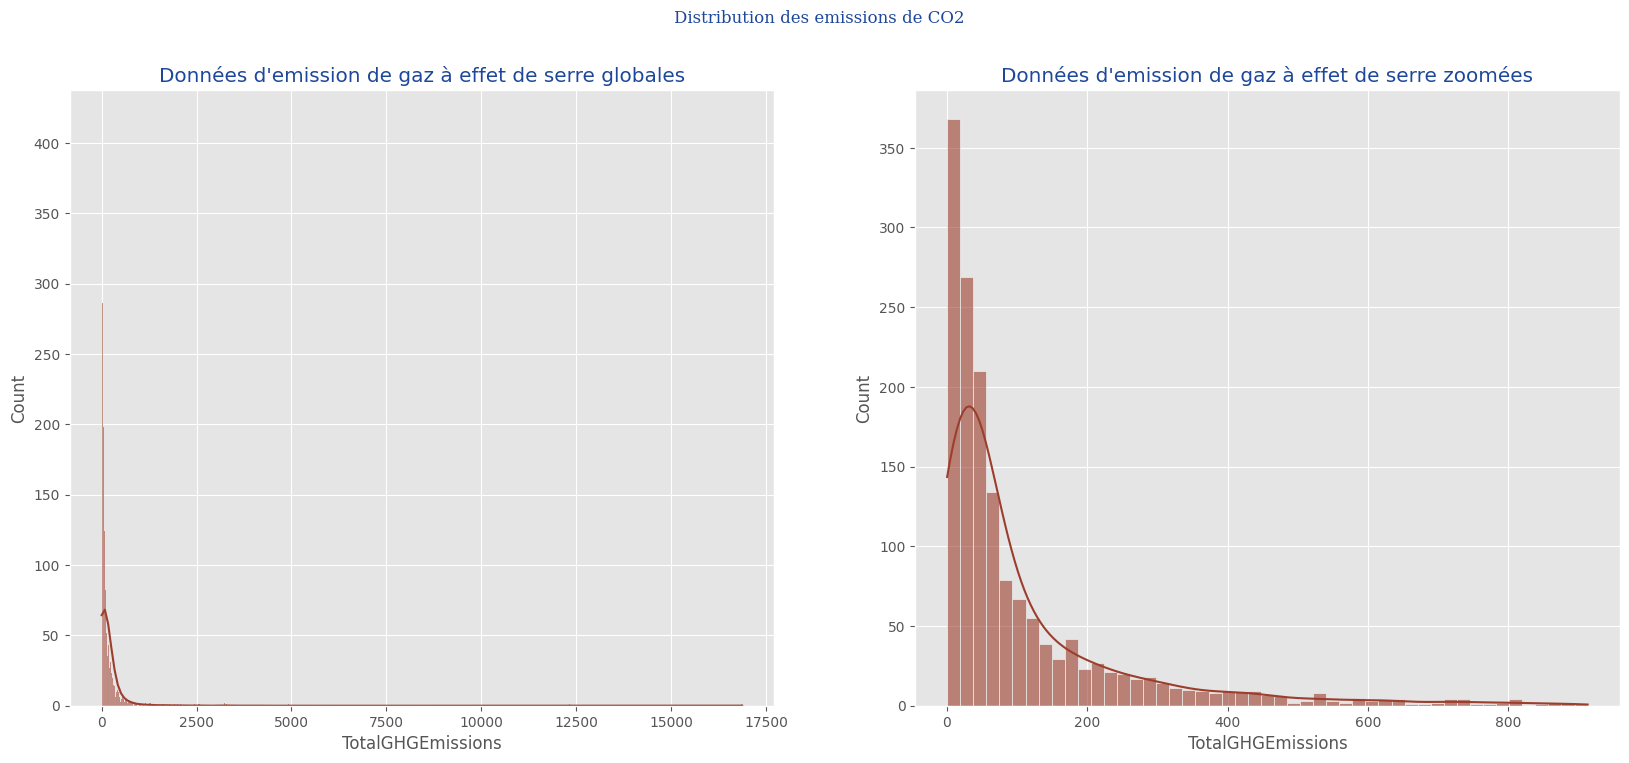

In [55]:
plt.style.use("ggplot")

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20, 8))

sns.histplot(
    data=data, x="TotalGHGEmissions", kde=True, ax=axes[0], color="#9C3E2D", alpha=0.6
)
axes[0].set_title(
    "Données d'emission de gaz à effet de serre globales", color="#1d479b"
)

sns.histplot(
    data=data[(data["TotalGHGEmissions"] < 1000)],
    x="TotalGHGEmissions",
    kde=True,
    ax=axes[1],
    color="#9C3E2D",
    alpha=0.6,
)
axes[1].set_title("Données d'emission de gaz à effet de serre zoomées", color="#1d479b")

plt.suptitle("Distribution des emissions de CO2", fontdict=font_title)
plt.show()

In [56]:
''''' 
    Meme chose pour notre seconde target TotalEmissionGHGE qui elle aussi n'est pas distribuée normalement. 
     Il est donc judicieux de passer à l'echelle logarithmique pour améliorer la distributivité.
 
'''''

"'' \n    Meme chose pour notre seconde target TotalEmissionGHGE qui elle aussi n'est pas distribuée normalement. \n     Il est donc judicieux de passer à l'echelle logarithmique pour améliorer la distributivité.\n \n"

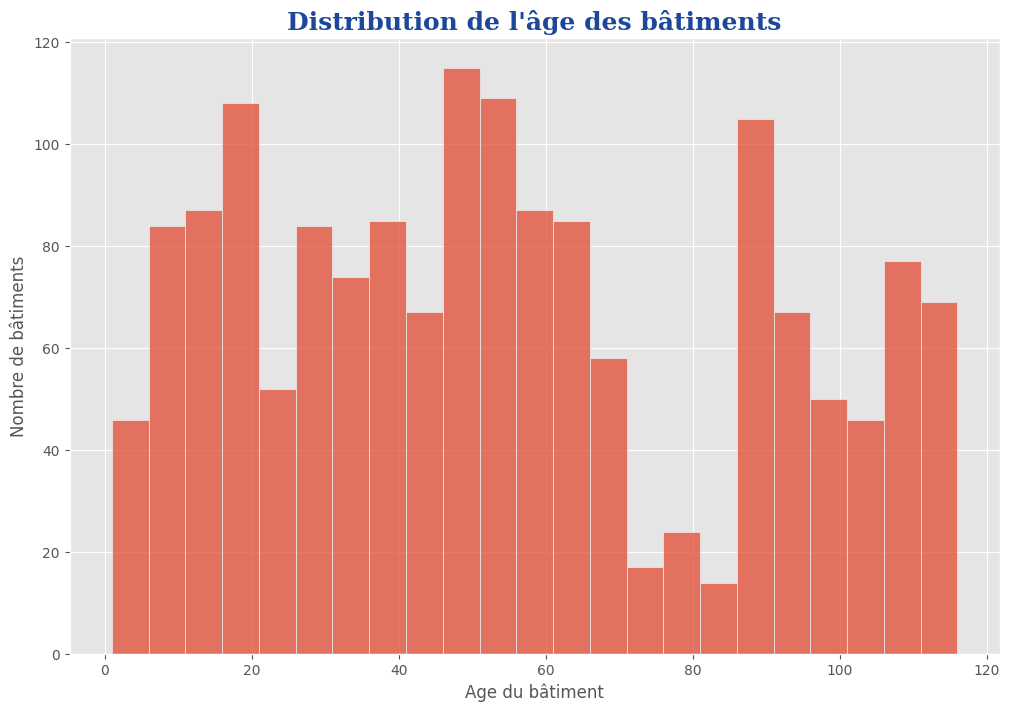

In [57]:
fig = plt.figure(figsize=(12, 8))
ax = sns.histplot(
    data=data,
    x="BuildingAge",
    bins=int((data.BuildingAge.max() - data.BuildingAge.min()) / 5),
)
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments", fontdict=font_title)
plt.show()

In [58]:
"""'' 

        Distribution inégale de l'age des batiments surtout pour les batiments de 70 à 85 ans.
        
""" ""

"'' \n\n        Distribution inégale de l'age des batiments surtout pour les batiments de 70 à 85 ans.\n        \n"

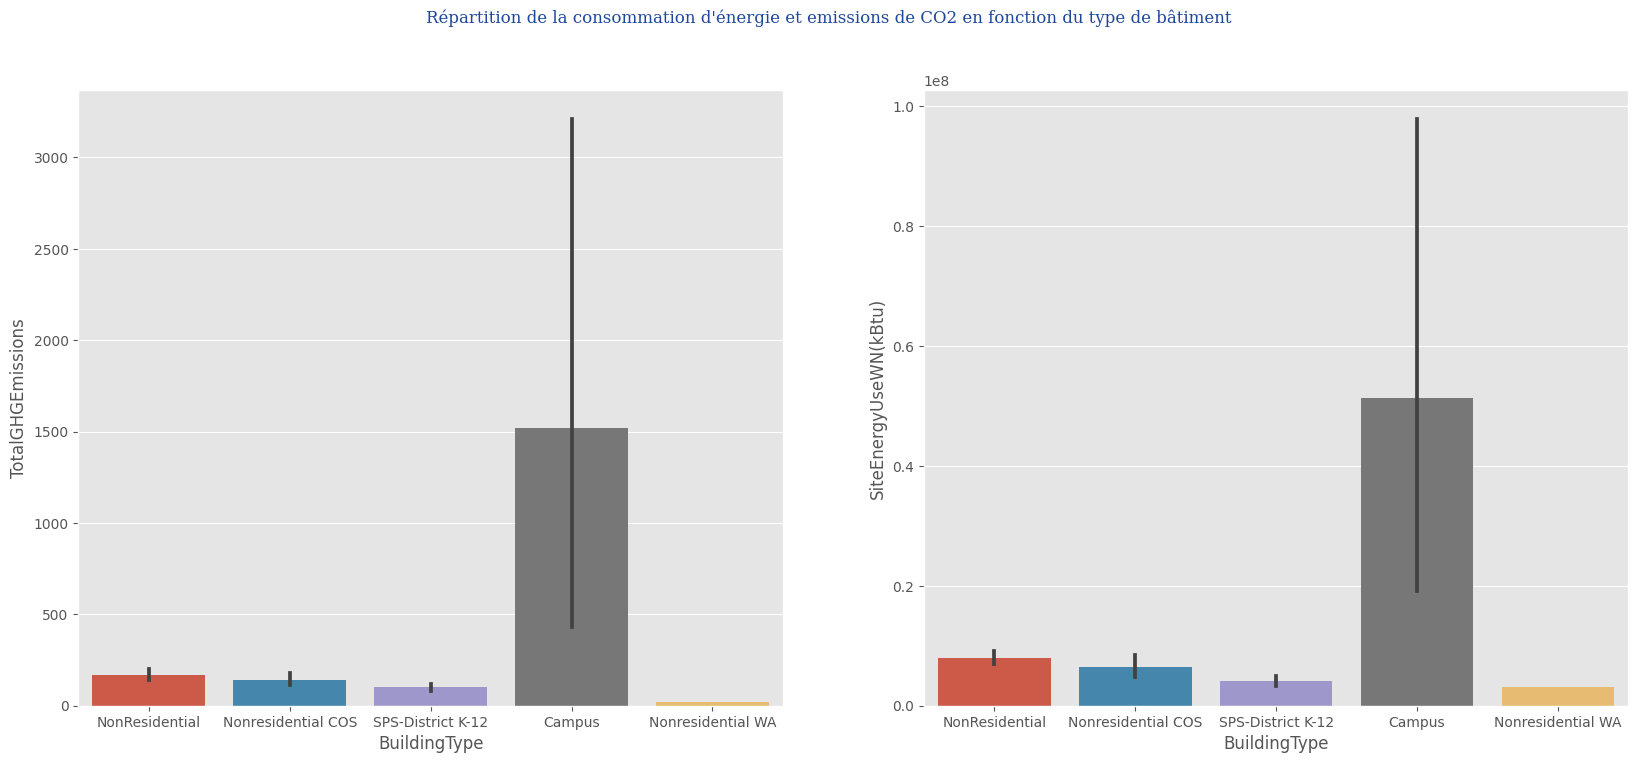

In [59]:
#Analyse multivariée

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20, 8))
sns.barplot(x="BuildingType", y="TotalGHGEmissions", data=data, ax=axes[0])
sns.barplot(x="BuildingType", y="SiteEnergyUseWN(kBtu)", data=data, ax=axes[1])
plt.suptitle(
    "Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment",
    fontdict=font_title,
)
plt.show()

In [60]:
''''' 
        Les building de type campus consomment nettement plus d'énergie et rejettent nettement plus de CO2.
        
''''' 

"'' \n        Les building de type campus consomment nettement plus d'énergie et rejettent nettement plus de CO2.\n        \n"

/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_16873/2396173949.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


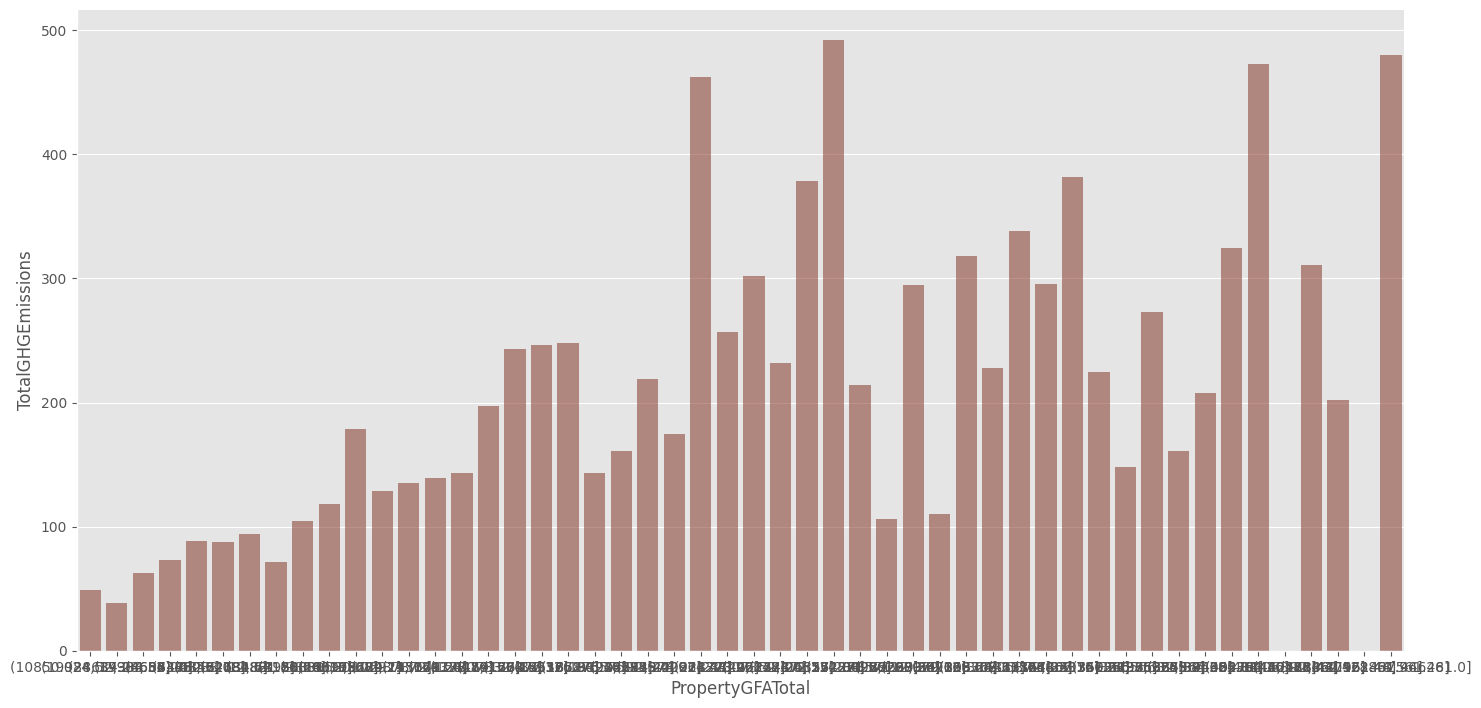

In [73]:
dataplot = data[(data["TotalGHGEmissions"] < 1000)]
dataplot = dataplot[(dataplot["PropertyGFATotal"] < 450000)]

bins = 50

try:
    
    sns.catplot(
    data=dataplot,
    kind="bar",
    x=pd.cut(dataplot["PropertyGFATotal"], bins=bins),
    y="TotalGHGEmissions",
    ci=None,
    color="#9C3E2D",
    alpha=0.6,
    height=7,
    aspect=2,
    )

except ValueError:
    pass

/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_16873/97482961.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


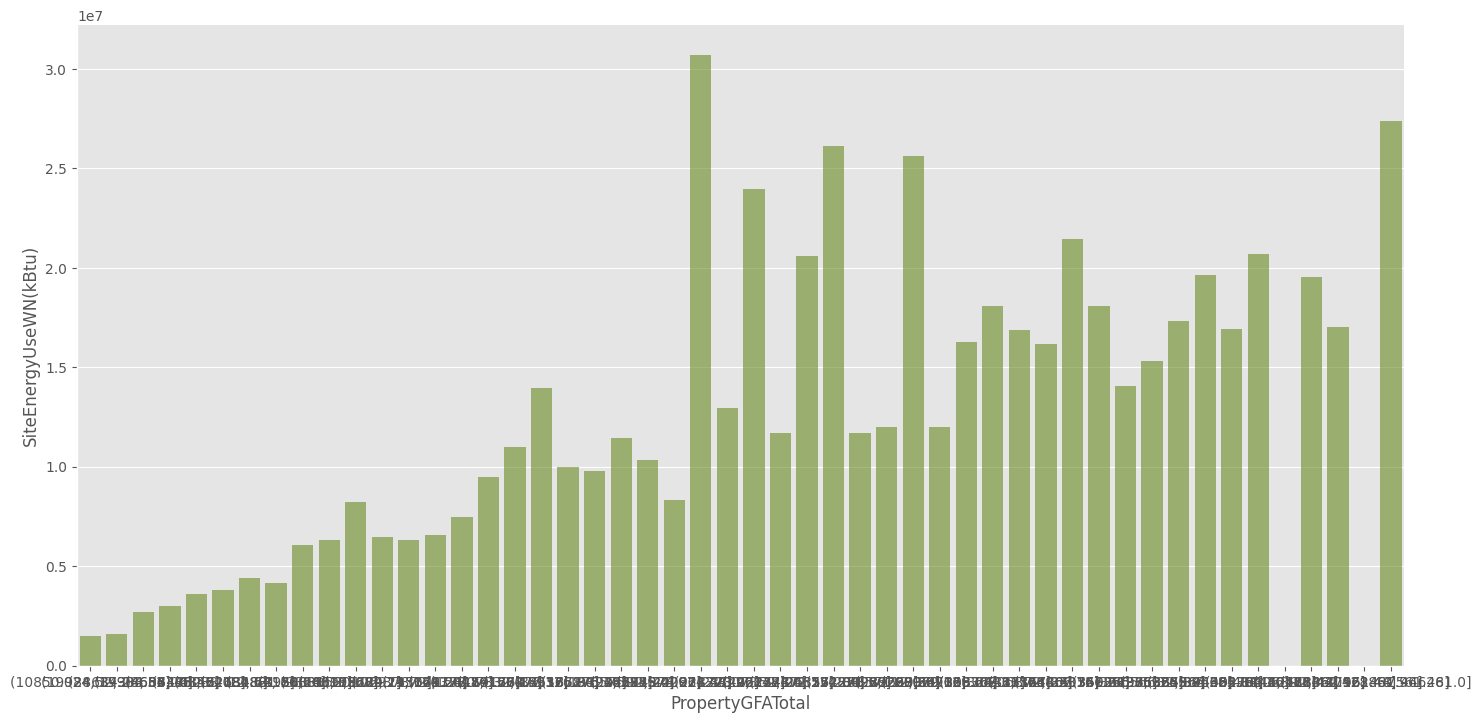

In [74]:
bins = 50

try:
    
    sns.catplot(
    data=dataplot,
    kind="bar",
    x=pd.cut(dataplot["PropertyGFATotal"], bins=bins),
    y="SiteEnergyUseWN(kBtu)",
    ci=None,
    color="#6D9C0E",
    alpha=0.6,
    height=7,
    aspect=2,
    )
    
except ValueError:
    pass

In [75]:
''''' 
        Plus la superficie augmente plus les building consommentd'énergie et rejettent de CO2.
        
''''' 

"'' \n        Plus la superficie augmente plus les building consommentd'énergie et rejettent de CO2.\n        \n"

/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_16873/3506554783.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


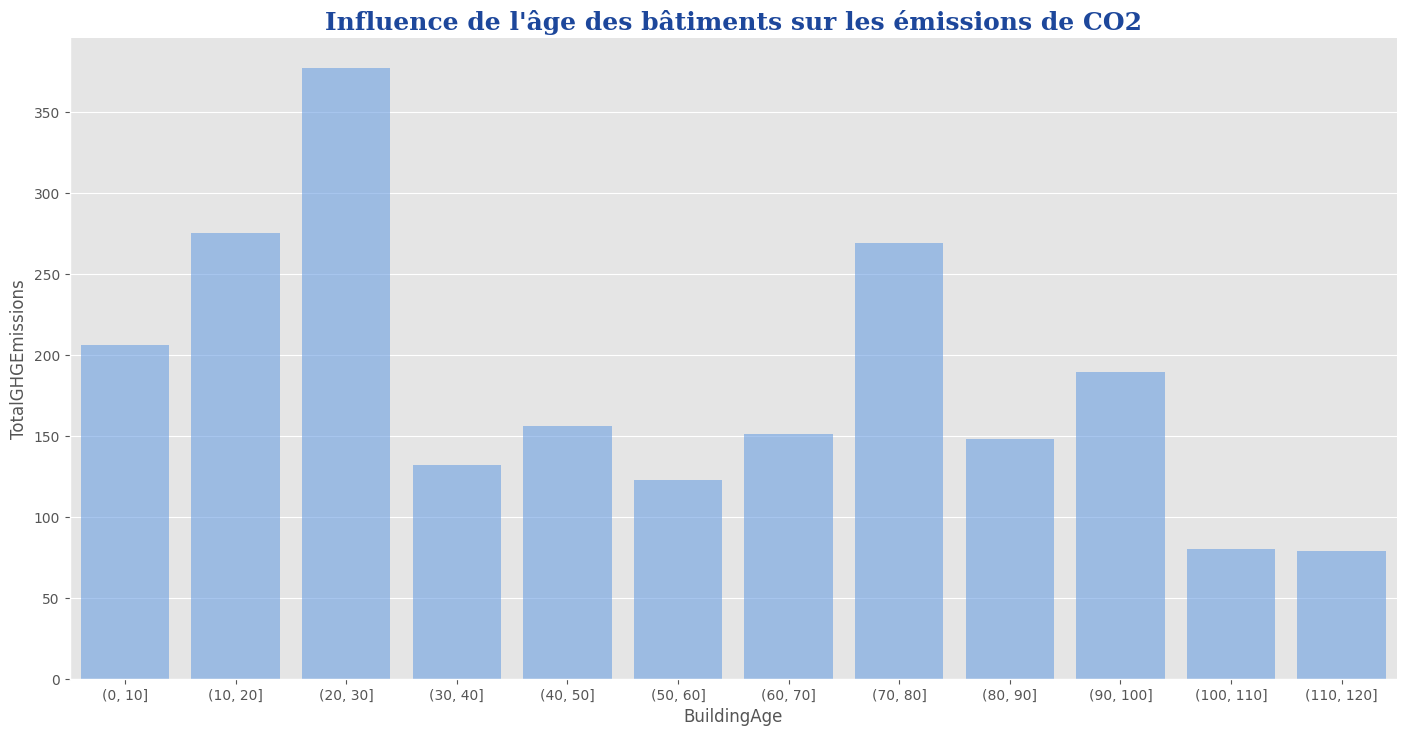

In [63]:
bins = pd.IntervalIndex.from_tuples(
    [
        (0, 10),
        (10, 20),
        (20, 30),
        (30, 40),
        (40, 50),
        (50, 60),
        (60, 70),
        (70, 80),
        (80, 90),
        (90, 100),
        (100, 110),
        (110, 120),
    ]
)

try:
    sns.catplot(
    data=data,
    kind="bar",
    x=pd.cut(data["BuildingAge"], bins=bins),
    y="TotalGHGEmissions",
    ci=None,
    color="#589DF5",
    alpha=0.6,
    height=7,
    aspect=2,
    )
except ValueError:
    pass
plt.title(
"Influence de l'âge des bâtiments sur les émissions de CO2", fontdict=font_title
)
plt.show()

In [64]:
'''''
        Les bâtiments les plus jeunes (0 à 30 ans) sont les batiments qui rejettent le plus de CO2.

''''' 

"''\n        Les bâtiments les plus jeunes (0 à 30 ans) sont les batiments qui rejettent le plus de CO2.\n\n"

/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_16873/391407820.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


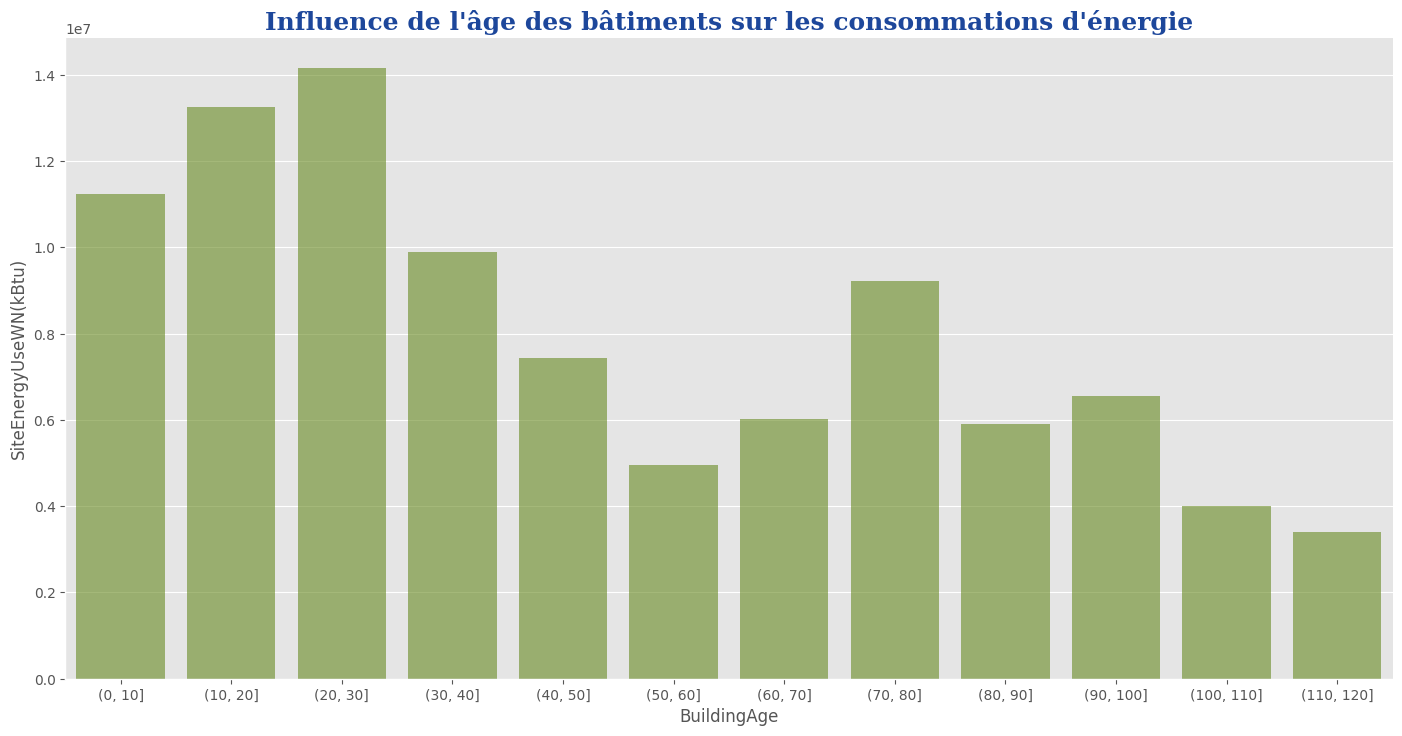

In [65]:
try:
    
    sns.catplot(
    data=data,
    kind="bar",
    x=pd.cut(data["BuildingAge"], bins=bins),
    y="SiteEnergyUseWN(kBtu)",
    ci=None,
    color="#6D9C0E",
    alpha=0.6,
    height=7,
    aspect=2,
    )
    
except ValueError:
    pass

plt.title(
    "Influence de l'âge des bâtiments sur les consommations d'énergie",
    fontdict=font_title,
)
plt.show()

In [66]:
''''' 
        Les bâtiments les plus jeunes (0 à 30 ans) sont les plus grand consommateurs energétiques.
        
''''' 

"'' \n        Les bâtiments les plus jeunes (0 à 30 ans) sont les plus grand consommateurs energétiques.\n        \n"

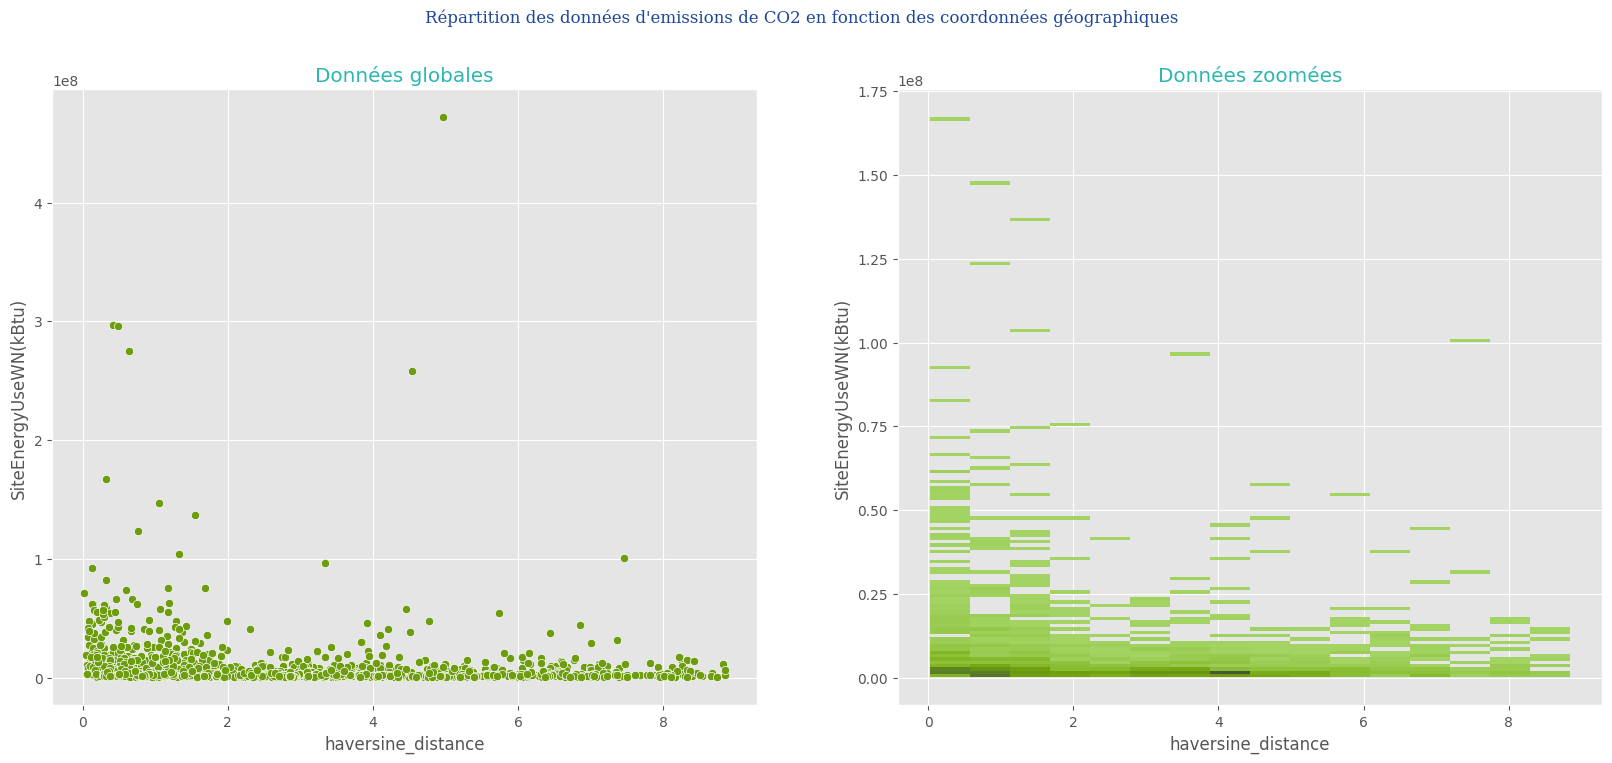

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, y="SiteEnergyUseWN(kBtu)", x="haversine_distance", color="#6D9C0E", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.histplot(data=data[(data['SiteEnergyUseWN(kBtu)'] < 2*10**8)], y="SiteEnergyUseWN(kBtu)", 
                x="haversine_distance", color="#6D9C0E", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données d'emissions de CO2 en fonction des coordonnées géographiques", 
             fontdict=font_title)
plt.show()

In [68]:
''''' 
        Plus on s'éloigne du centre de Seattle, moins les batiments consomment d'énergie.
        
''''' 

"'' \n        Plus on s'éloigne du centre de Seattle, moins les batiments consomment d'énergie.\n        \n"

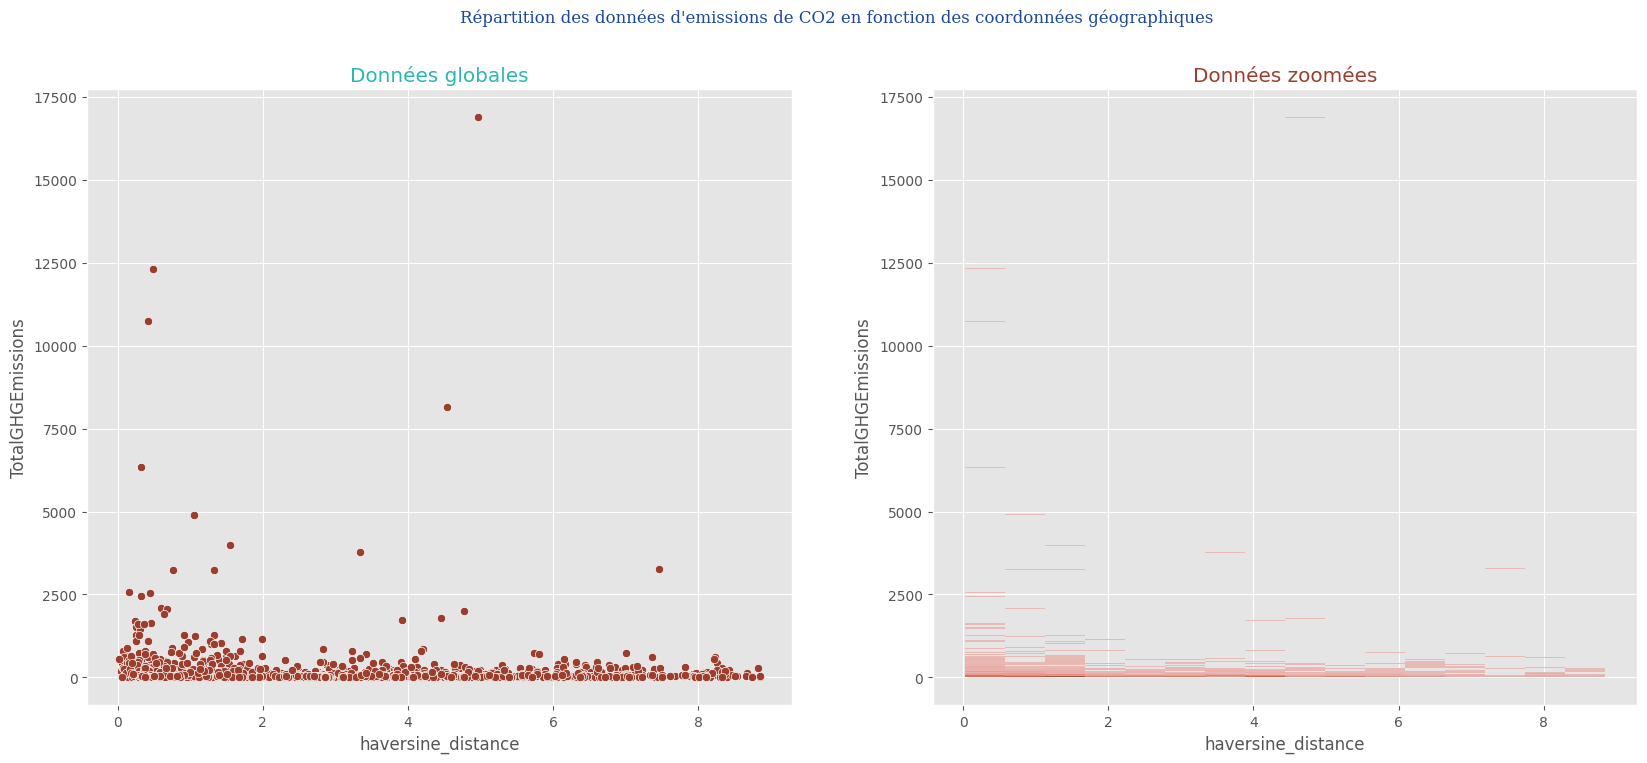

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, y="TotalGHGEmissions", x="haversine_distance", color="#9C3E2D", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.histplot(data=data[(data['TotalGHGEmissions'] < 2*10**8)], y="TotalGHGEmissions", 
                x="haversine_distance", color="#9C3E2D", ax=axes[1])
axes[1].set_title("Données zoomées", color='#9C3E2D')
plt.suptitle("Répartition des données d'emissions de CO2 en fonction des coordonnées géographiques", 
             fontdict=font_title)
plt.show()

In [70]:
''''' 
        Plus on s'éloigne du centre de Seattle, moins les batiments rejettent de CO2.

''''' 

"'' \n        Plus on s'éloigne du centre de Seattle, moins les batiments rejettent de CO2.\n\n"

In [72]:
#Représentation Geographique avec Folium

import folium
import folium.plugins

seattle_map = folium.Map(location=[seattle_lat, seattle_lon], zoom_start=11)

# Clusters

marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, in zip(data.Latitude, data.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

seattle_map